# TIME SERIES MODELLING

### Load default functions
Note that you can save all usual python code I use in all lectures are just saved in the **default-functions.py** file,  
which I just load by running 

`%run default-functions.py`

In [1]:
%run default-functions.py

/Users/magtanggoldg/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## PH Temperature

In [14]:
#Load and preprocess data
temp_df = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/ph_temp.csv')
temp_df.columns = ['Year', 'Month', 'Temp']
temp_df['Day'] = 1
temp_df['Date'] = pd.to_datetime(temp_df[['Year', 'Month', 'Day']])
temp_df = temp_df.set_index('Date').drop(['Year', 'Day'], axis = 1)
temp_df = temp_df.join(pd.get_dummies(temp_df['Month'])).drop('Month', axis = 1).drop(1, axis = 1)
temp_df.columns = ['Temp', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [4]:
temp_df.head()

,Temp,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Date,,,,,,,,,,,,
1991-01-01,25.0624,0,0,0,0,0,0,0,0,0,0,0
1991-02-01,25.0420,1,0,0,0,0,0,0,0,0,0,0
1991-03-01,25.7049,0,1,0,0,0,0,0,0,0,0,0
1991-04-01,26.5827,0,0,1,0,0,0,0,0,0,0,0
1991-05-01,27.1703,0,0,0,1,0,0,0,0,0,0,0


Text(0.5,1,'PH Temperature 1991-2014')

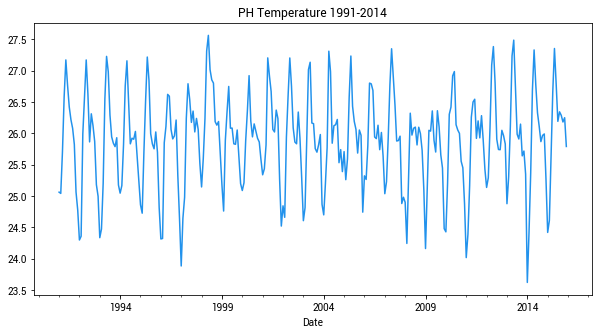

In [20]:
#plot data
temp_df['Temp'].plot(color = col[2], figsize = (10,5))
plt.title('PH Temperature 1991-2014')

In [21]:
#Fit a normal regression function on temperature
model = sm.OLS(temp_df['Temp'], sm.add_constant(temp_df.iloc[:,1:])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     102.1
Date:                Sat, 20 Oct 2018   Prob (F-statistic):           1.60e-92
Time:                        01:34:33   Log-Likelihood:                -98.173
No. Observations:                 300   AIC:                             220.3
Df Residuals:                     288   BIC:                             264.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7337      0.069    361.004      0.000      24.599      24.869
Feb            0.1767      0.097      1.824      0.069      -0.014       0.367
Mar            1.0291      0.097     10.621      0.000       0.838       1.220
Apr            1.9189      0.097     19.804      0.000       1.728       2.110
May            2.2854      0.097     23.587      0.000       2.095       2.476
Jun            1.8335      0.097     18.923      0.000       1.643       2.024
Jul            1.3781      0.097     14.222      0.000       1.187       1.569
Aug            1.3238      0.097     13.663      0.000       1.133       1.515
Sep            1.2553      0.097     12.956      0.000       1.065       1.446
Oct            1.2295      0.097     12.689      0.000       1.039       1.420
Nov            0.9772      0.097     10.085      0.000       0.786       1.168
Dec            0.4353      0.097      4.492      0.000       0.245       0.626
==============================================================================
Omnibus:                        5.725   Durbin-Watson:                   1.007
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.474
Skew:                          -0.319   Prob(JB):                       0.0648
Kurtosis:                       3.173   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Calculate seasonal index

- Get the **YEARLY AVERAGE** =  
`AVE(All months for a year)`


- Calculate **SEASONAL INDEX PER YEAR** =  
`Temp of Month for that year / Yearly Average for that year`

- Calculate **AVE. ANNUAL SEASONAL INDEX PER MONTH** =  
`Average of seasonal index across all years per month`

In [26]:
#Yearly average
yearly_ave = temp_df2.groupby('Year').mean()['Temp']

dese = []
for x in range(temp_df2.shape[0]):
    #Calculate seasonal index per month
    dese.append(temp_df2['Temp'][x]/yearly_ave[temp_df2['Year'][x]])
    
#get the ave annual seasonal index per month
temp_df2['deseason'] = dese
si = temp_df2.groupby('Month').mean()['deseason']
si

Month
1     0.955413
2     0.962237
3     0.995196
4     1.029537
5     1.043697
6     1.026269
7     1.008684
8     1.006599
9     1.003960
10    1.002968
11    0.993197
12    0.972244
Name: deseason, dtype: float64

### Get Deseasonalized Temperature

Divide each value by its corresponding seasonal index.

In [27]:
dese2 = []

for x in range(temp_df2.shape[0]):

    dese2.append(temp_df2['Temp'][x]/si[temp_df2['Month'][x]])
    
temp_df2['deseason2'] = dese2


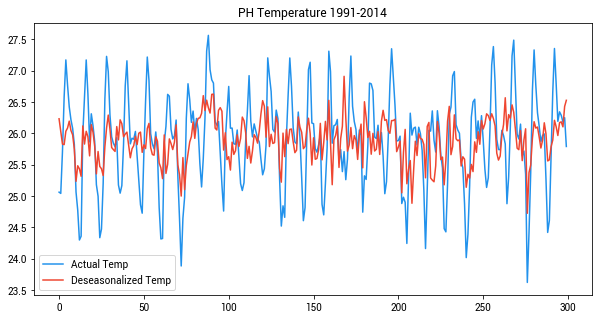

In [28]:
temp_df2['Temp'].plot(color = col[2], figsize = (10,5), label = 'Actual Temp')
temp_df2['deseason2'].plot(color = col[0], figsize = (10,5), label='Deseasonalized Temp')
plt.title('PH Temperature 1991-2014')
plt.legend()

# HARMON FOODS CASE STUDY

Load dataset and deseasonalize shipments

In [30]:
harmon= pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/Harmon.csv').iloc[:, :5]
harmon['Date'] = pd.to_datetime(harmon.Month)
harmon = harmon.set_index('Date')
harmon.Month = harmon.Month.apply(lambda x: x.split('-')[0])

#deseasonalize shipments
SI = harmon[['Month','SIndex']][:12].set_index('Month')
harmon = harmon.iloc[12:]
des = []
for x in range(harmon.shape[0]):
    des.append(harmon.Caseship[x]/(SI.loc[harmon.Month[x]].values[0]/100))

harmon['Deseasonalized'] = des

Plot actual shipments vs deseasonalized shipments

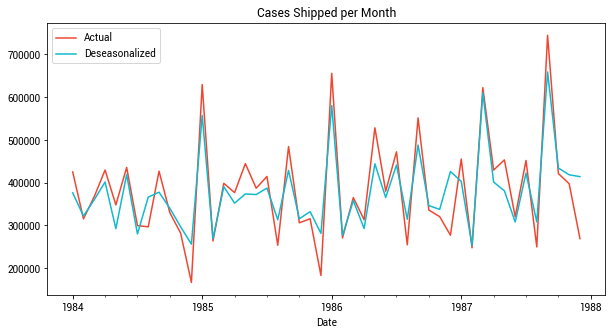

In [161]:
harmon['Caseship'].plot(color = col[0], figsize = (10,5), label = 'Actual')
harmon['Deseasonalized'].plot(color = col[1], figsize = (10,5), label = 'Deseasonalized')
plt.title('Cases Shipped per Month')
plt.legend()


Fit model using deseasonalized model, with Conpacks and DealAl

In [32]:
model = sm.OLS(harmon['Deseasonalized'], sm.add_constant(harmon[['Conpacks', 'DealAl']])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Deseasonalized   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     69.13
Date:                Sat, 20 Oct 2018   Prob (F-statistic):           1.90e-14
Time:                        01:43:16   Log-Likelihood:                -580.72
No. Observations:                  48   AIC:                             1167.
Df Residuals:                      45   BIC:                             1173.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.009e+05   9347.167     32.192      0.000    2.82e+05     3.2e+05
Conpacks       0.3966      0.048      8.227      0.000       0.300       0.494
DealAl         0.0742      0.007     10.102      0.000       0.059       0.089
==============================================================================
Omnibus:                        0.582   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.748   Jarque-Bera (JB):                0.703
Skew:                           0.147   Prob(JB):                        0.704
Kurtosis:                       2.485   Cond. No.                     1.49e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Create the lagged dataset for Conpacks and DealAl

To do this, we can use `df.shift(t)`, where **t is the number of rows to shift**.  
We can then join back the shifted dataset to the original dataset

In [33]:
harmon_lag = harmon.join(harmon.shift(1)[['Conpacks', 'DealAl']], rsuffix='_lag1').join(harmon.shift(2)[['Conpacks', 'DealAl']], rsuffix='_lag2')
harmon_lag = harmon_lag[['Month', 'Caseship', 'Deseasonalized', 'Conpacks', 'Conpacks_lag1', 'Conpacks_lag2', 'DealAl', 'DealAl_lag1', 'DealAl_lag2']].iloc[2:]

In [34]:
harmon_lag.head()

,Month,Caseship,Deseasonalized,Conpacks,Conpacks_lag1,Conpacks_lag2,DealAl,DealAl_lag1,DealAl_lag2
Date,,,,,,,,,
1984-03-01,Mar,367286.0,360084.313725,134440,15036.0,75253.0,259952,254396.0,457732.0
1984-04-01,Apr,429432.0,401338.317757,119740,134440.0,15036.0,267368,259952.0,254396.0
1984-05-01,May,347874.0,292331.092437,135590,119740.0,134440.0,158504,267368.0,259952.0
1984-06-01,Jun,435529.0,418777.884615,189639,135590.0,119740.0,430012,158504.0,267368.0
1984-07-01,Jul,299403.0,279815.887850,9308,189639.0,135590.0,388516,430012.0,158504.0


Fit a new model to get better result

In [36]:
model = sm.OLS(harmon_lag['Deseasonalized'], sm.add_constant(harmon_lag.iloc[:,3:])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Deseasonalized   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     36.39
Date:                Sat, 20 Oct 2018   Prob (F-statistic):           1.69e-14
Time:                        01:44:53   Log-Likelihood:                -546.20
No. Observations:                  46   AIC:                             1106.
Df Residuals:                      39   BIC:                             1119.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.147e+05   1.29e+04     24.483      0.000    2.89e+05    3.41e+05
Conpacks          0.4217      0.043      9.712      0.000       0.334       0.510
Conpacks_lag1    -0.1614      0.042     -3.813      0.000      -0.247      -0.076
Conpacks_lag2     0.0167      0.044      0.380      0.706      -0.072       0.106
DealAl            0.0704      0.007     10.749      0.000       0.057       0.084
DealAl_lag1       0.0117      0.006      1.804      0.079      -0.001       0.025
DealAl_lag2      -0.0112      0.006     -1.729      0.092      -0.024       0.002
==============================================================================
Omnibus:                        0.906   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.636   Jarque-Bera (JB):                0.506
Skew:                           0.255   Prob(JB):                        0.777
Kurtosis:                       3.068   Cond. No.                     2.83e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Create an **autocorrelation** plot

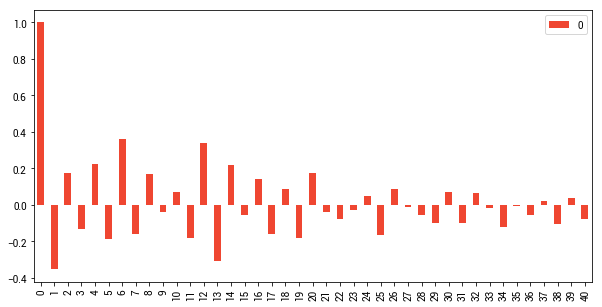

In [38]:
from statsmodels.tsa.stattools import acf, pacf
pd.DataFrame(acf(harmon_lag['Deseasonalized'])).plot(kind = 'bar', color = col[0], figsize = (10, 5))

Fit a model using **autoregressive** features

In [39]:
harmon_lag2 = harmon_lag.join(harmon_lag.shift(1)['Deseasonalized'], rsuffix = '_lag1').join(harmon_lag.shift(2)['Deseasonalized'], rsuffix = '_lag2').iloc[2:]
model = sm.OLS(harmon_lag2['Deseasonalized'], sm.add_constant(harmon_lag2.iloc[:,3:])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Deseasonalized   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     30.61
Date:                Sat, 20 Oct 2018   Prob (F-statistic):           1.33e-13
Time:                        01:46:01   Log-Likelihood:                -519.15
No. Observations:                  44   AIC:                             1056.
Df Residuals:                      35   BIC:                             1072.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.969e+05   7.35e+04      2.680      0.011    4.77e+04    3.46e+05
Conpacks                0.4251      0.045      9.547      0.000       0.335       0.516
Conpacks_lag1          -0.1748      0.077     -2.279      0.029      -0.330      -0.019
Conpacks_lag2          -0.0898      0.068     -1.318      0.196      -0.228       0.049
DealAl                  0.0716      0.006     11.303      0.000       0.059       0.084
DealAl_lag1             0.0111      0.013      0.863      0.394      -0.015       0.037
DealAl_lag2            -0.0338      0.012     -2.925      0.006      -0.057      -0.010
Deseasonalized_lag1     0.0634      0.166      0.381      0.705      -0.274       0.401
Deseasonalized_lag2     0.3085      0.128      2.414      0.021       0.049       0.568
==============================================================================
Omnibus:                        1.262   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                0.488
Skew:                           0.119   Prob(JB):                        0.783
Kurtosis:                       3.458   Cond. No.                     1.78e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
harmon_lag2.head()

,Month,Caseship,Deseasonalized,Conpacks,Conpacks_lag1,Conpacks_lag2,DealAl,DealAl_lag1,DealAl_lag2,Deseasonalized_lag1,Deseasonalized_lag2
Date,,,,,,,,,,,
1984-05-01,May,347874.0,292331.092437,135590,119740.0,134440.0,158504,267368.0,259952.0,401338.317757,360084.313725
1984-06-01,Jun,435529.0,418777.884615,189639,135590.0,119740.0,430012,158504.0,267368.0,292331.092437,401338.317757
1984-07-01,Jul,299403.0,279815.887850,9308,189639.0,135590.0,388516,430012.0,158504.0,418777.884615,292331.092437
1984-08-01,Aug,296505.0,366055.555556,41099,9308.0,189639.0,225616,388516.0,430012.0,279815.887850,418777.884615
1984-09-01,Sep,426701.0,377611.504425,9391,41099.0,9308.0,1042304,225616.0,388516.0,366055.555556,279815.887850


In [41]:
harmon_ar = harmon.join(harmon.shift(1)['Deseasonalized'], rsuffix='_lag1').join(harmon.shift(2)['Deseasonalized'], rsuffix='_lag2').join(harmon.shift(3)['Deseasonalized'], rsuffix='_lag3').join(harmon.shift(4)['Deseasonalized'], rsuffix='_lag4')
harmon_ar = harmon_ar.iloc[5:, 5:]

model = sm.OLS(harmon_ar['Deseasonalized'], sm.add_constant(harmon_ar.iloc[:,1:])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Deseasonalized   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1.884
Date:                Sat, 20 Oct 2018   Prob (F-statistic):              0.133
Time:                        01:46:08   Log-Likelihood:                -548.20
No. Observations:                  43   AIC:                             1106.
Df Residuals:                      38   BIC:                             1115.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.811e+05   1.69e+05      2.261      0.030    3.99e+04    7.22e+05
Deseasonalized_lag1    -0.3053      0.159     -1.925      0.062      -0.626       0.016
Deseasonalized_lag2     0.0388      0.168      0.232      0.818      -0.301       0.378
Deseasonalized_lag3     0.0320      0.178      0.180      0.858      -0.328       0.392
Deseasonalized_lag4     0.2410      0.191      1.263      0.214      -0.145       0.627
==============================================================================
Omnibus:                       10.418   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                9.769
Skew:                           1.049   Prob(JB):                      0.00756
Kurtosis:                       4.025   Cond. No.                     9.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""